# 선형 회귀분석

## 보스턴 집값 예측

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston) 

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
import pandas as pd

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfX.shape, dfy.shape

((506, 13), (506, 1))

In [3]:
df = pd.concat([dfX, dfy], axis=1)
df.tail() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

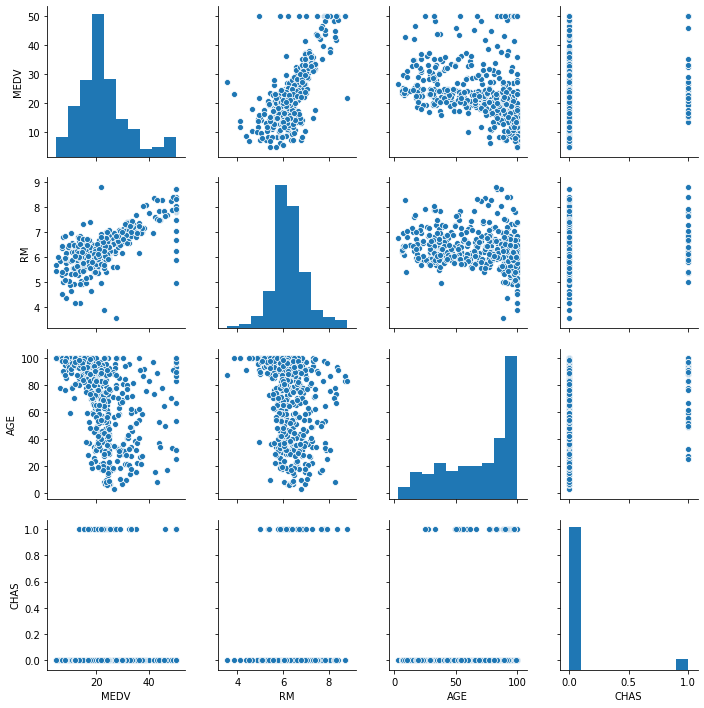

In [5]:
import seaborn as sns

sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

## 당뇨병 진행도 예측

In [6]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


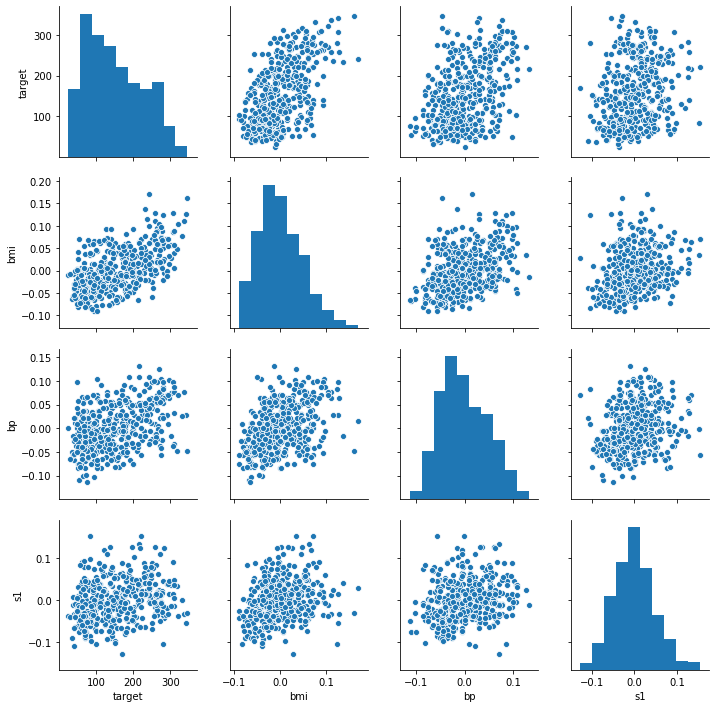

In [7]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show() 

## 상수항 결합

In [8]:
import numpy as np

X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [9]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## NumPy를 이용한 선형 회귀분석

In [10]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1) 

In [11]:
w

array(86.44794301)

In [12]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

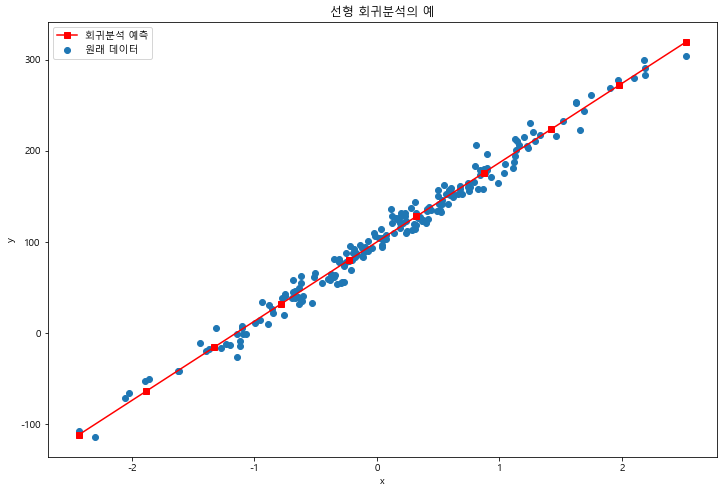

In [15]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.figure(figsize=(12,8))
plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show() 

## scikit-learn 패키지를 사용한 선형 회귀분석

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_) 

[99.79150869] [[86.96171201]]


In [17]:
model.predict([[-2], [-1], [0], [1], [2]]) 

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

## statsmodels 패키지를 사용한 선형 회귀분석

In [18]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [19]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit() 

C:\Users\ckkim\.conda\envs\tf2\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          8.17e-182
Time:                        17:11:17   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [22]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

In [21]:
result.predict({"x": [-2, -1, 0, 1, 2] }) 

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

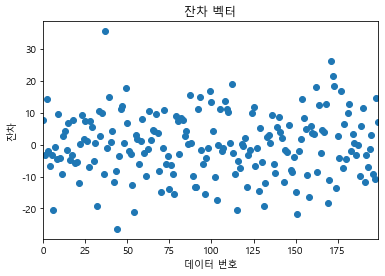

In [23]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show() 

## 보스턴 집값 예측

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        17:31:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## 스케일링

In [25]:
dfX.describe().loc["std"] 

const        0.000000
CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [27]:
dfX2 = dfX.copy()
dfX2["TAX"] *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.39
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           8.62e-44
Time:                        19:49:06   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.543      0.0

In [28]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        19:49:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.